## 问题2数学建模过程

### 1. 问题描述

将16个加工原料进行混合，全部放入9个加工窖中。请建立数学模型，求出饲料质量最高的混合方案，并给出每个加工包的亲缘度。

### 2. 数学模型

#### 变量定义

- **$x_{ij}$**：原料 $i$ 是否分配到加工窖 $j$，$x_{ij} \in \{0, 1\}$，其中 $i \in \{1, 2, \ldots, 16\}$，$j \in \{1, 2, \ldots, 9\}$。
- **$y_j$**：加工窖 $j$ 是否被使用，$y_j \in \{0, 1\}$，其中 $j \in \{1, 2, \ldots, 9\}$。
- **$a_{ij}$**：原料 $i$ 和原料 $j$ 之间的亲缘值。
- **$w_i$**：原料 $i$ 的重量。

#### 亲缘值的计算

亲缘值 **$a_{ij}$** 定义为原料 $i$ 和原料 $j$ 基因序列中相同位点的数量：

$$
a_{ij} = \sum_{k=1}^{10} \delta(g_i^k, g_j^k)
$$

其中，**$g_i^k$** 表示原料 $i$ 的第 $k$ 个基因位点，**$\delta(g_i^k, g_j^k)$** 为指示函数：

$$
\delta(g_i^k, g_j^k) = \begin{cases} 
1, & \text{if } g_i^k = g_j^k \\
0, & \text{if } g_i^k \ne g_j^k 
\end{cases}
$$

#### 目标函数

最大化饲料的加权亲缘度。每个加工包的亲缘度定义为包中所有原料两两之间亲缘值的平均值。总目标是最大化所有加工包亲缘度的加权平均值。

目标函数表示为：

$$
\text{Maximize} \sum_{j=1}^{9} \left( \frac{\sum_{i=1}^{16} \sum_{k=i+1}^{16} a_{ik} x_{ij} x_{kj}}{\sum_{i=1}^{16} x_{ij} \left( \sum_{k=i+1}^{16} x_{kj} \right)} \cdot \sum_{i=1}^{16} w_i x_{ij} \right)
$$

#### 约束条件

1. **每种原料必须分配到一个加工窖中**：

$$
\sum_{j=1}^{9} x_{ij} = 1 \quad \forall i \in \{1, 2, \ldots, 16\}
$$

2. **每个加工窖的重量必须在限定范围内**：

$$
S_j^{\min} \leq \sum_{i=1}^{16} w_i x_{ij} \leq S_j^{\max} \quad \forall j \in \{1, 2, \ldots, 9\}
$$

其中，$S_j^{\min}$ 和 $S_j^{\max}$ 分别为加工窖 $j$ 的最小和最大重量。

3. **不能将品种代码为10的原料单独放入一个加工包**：

$$
x_{10, j} + \sum_{i=1}^{16} x_{ij} \geq 2y_j \quad \forall j \in \{1, 2, \ldots, 9\}
$$

4. **每个加工窖必须被使用**：

$$
\sum_{i=1}^{16} x_{ij} \geq y_j \quad \forall j \in \{1, 2, \ldots, 9\}
$$

### 3. 数学表达式详解

1. **变量定义**：
    - $x_{ij}$ 表示原料 $i$ 是否分配到加工窖 $j$。若分配则为1，否则为0。
    - $y_j$ 表示加工窖 $j$ 是否被使用。若使用则为1，否则为0。
    - $a_{ij}$ 表示原料 $i$ 和原料 $j$ 之间的亲缘值。

2. **亲缘值计算**：
    - 亲缘值 $a_{ij}$ 计算公式：
      $$
      a_{ij} = \sum_{k=1}^{10} \delta(g_i^k, g_j^k)
      $$
    - 其中 $\delta(g_i^k, g_j^k)$ 是一个指示函数，当两个基因位点相同时取值1，否则取值0。

3. **目标函数**：
    - 目标是最大化加权亲缘度。
      $$
      \text{Maximize} \sum_{j=1}^{9} \left( \frac{\sum_{i=1}^{16} \sum_{k=i+1}^{16} a_{ik} x_{ij} x_{kj}}{\sum_{i=1}^{16} x_{ij} \left( \sum_{k=i+1}^{16} x_{kj} \right)} \cdot \sum_{i=1}^{16} w_i x_{ij} \right)
      $$

4. **约束条件**：
    - 每种原料必须分配到一个加工窖中：
      $$
      \sum_{j=1}^{9} x_{ij} = 1 \quad \forall i
      $$
    - 每个加工窖的重量必须在限定范围内：
      $$
      S_j^{\min} \leq \sum_{i=1}^{16} w_i x_{ij} \leq S_j^{\max} \quad \forall j
      $$
    - 不能将品种代码为10的原料单独放入一个加工包：
      $$
      x_{10, j} + \sum_{i=1}^{16} x_{ij} \geq 2y_j \quad \forall j
      $$
    - 每个加工窖必须被使用：
      $$
      \sum_{i=1}^{16} x_{ij} \geq y_j \quad \forall j
      $$

In [1]:
import numpy as np
import pulp
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph.*")

# 原料基因数据
genes = [
    ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
    ['a', 'b', 'c', 'd', 'e', 'o', 'p', 'k', 'l', 'm'],
    ['f', 'g', 'h', 'a', 'j', 'o', 'p', 'k', 'l', 'm'],
    ['f', 'g', 'h', 'i', 'j', 'l', 'p', 'f', 'o', 'p'],
    ['f', 'b', 'h', 'd', 'e', 'o', 'p', 'a', 'o', 'z'],
    ['r', 'm', 't', 'u', 'q', 'f', 'g', 'a', 'f', 'z'],
    ['r', 's', 't', 'u', 'k', 'f', 'g', 'h', 'f', 'c'],
    ['r', 's', 't', 'u', 'a', 'b', 'h', 'i', 'j', 'c'],
    ['c', 's', 'a', 'f', 'v', 'w', 'a', 'i', 'j', 'c'],
    ['b', 'm', 'n', 'i', 'a', 'z', 'h', 'f', 'o', 'z'],
    ['m', 'a', 'm', 'e', 'a', 'z', 'a', 'b', 'a', 'b'],
    ['m', 'c', 'm', 'e', 'x', 'h', 'a', 'b', 'n', 'a'],
    ['b', 'a', 'n', 'y', 'c', 'g', 'm', 'b', 'm', 'b'],
    ['m', 'c', 'm', 'y', 'x', 'g', 'm', 'b', 'n', 'b'],
    ['b', 'x', 'n', 'i', 'c', 'l', 'b', 'c', 'm', 'p'],
    ['c', 'c', 'a', 'f', 'x', 'h', 'b', 'c', 'm', 'j']
]

weights = [300, 500, 200, 500, 300, 400, 300, 300, 400, 600, 100, 600, 500, 400, 300, 300]



In [2]:
# 加工窖信息
silos = [
    {"id": 1, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 2, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 3, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 4, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 5, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 6, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 7, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6},
    {"id": 8, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6},
    {"id": 9, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6}
]

In [3]:
# 计算亲缘值
def calculate_affinity(genome1, genome2):
    return sum(g1 == g2 for g1, g2 in zip(genome1, genome2))

# 创建亲缘值矩阵
affinity_matrix = np.zeros((16, 16))
for i in range(16):
    for j in range(i + 1, 16):
        affinity_matrix[i, j] = calculate_affinity(genes[i], genes[j])
        affinity_matrix[j, i] = affinity_matrix[i, j]

In [4]:
# 创建优化问题
prob = pulp.LpProblem("Maximize_Affinity", pulp.LpMaximize)

# 决策变量
x = pulp.LpVariable.dicts("x", ((i, j) for i in range(1, 17) for j in range(1, 10)), cat='Binary')
y = pulp.LpVariable.dicts("y", (j for j in range(1, 10)), cat='Binary')  # 是否使用某个加工窖的变量

In [5]:
# 目标函数：最大化加权亲缘度
prob += pulp.lpSum(affinity_matrix[i-1][k-1] * (x[i, j] + x[k, j] - 1) * weights[i-1] for i in range(1, 17) for j in range(1, 10) for k in range(i+1, 17))

# 约束条件
# 1. 每种原料必须分配到一个加工窖中
for i in range(1, 17):
    prob += pulp.lpSum(x[i, j] for j in range(1, 10)) == 1

# 2. 每个加工窖的重量必须在限定范围内
for j in range(1, 10):
    prob += pulp.lpSum(x[i, j] * weights[i-1] for i in range(1, 17)) <= silos[j-1]["max_weight"]
    prob += pulp.lpSum(x[i, j] * weights[i-1] for i in range(1, 17)) >= silos[j-1]["min_weight"]

# 3. 不能将品种代码为10的原料单独放入一个加工包
for j in range(1, 10):
    prob += x[10, j] + pulp.lpSum(x[i, j] for i in range(1, 17) if i != 10) >= 2 * y[j]

# 4. 每个加工窖必须被使用
for j in range(1, 10):
    prob += pulp.lpSum(x[i, j] for i in range(1, 17)) >= y[j]
    prob += y[j] == 1

# 求解问题
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/yooky/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ng/h1_4zcsj2qq895j6xpxvjyqh0000gn/T/73dc9eeac2e04015b68c86540c9e3003-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/ng/h1_4zcsj2qq895j6xpxvjyqh0000gn/T/73dc9eeac2e04015b68c86540c9e3003-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 66 COLUMNS
At line 1264 RHS
At line 1326 BOUNDS
At line 1480 ENDATA
Problem MODEL has 61 rows, 153 columns and 747 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00


-1

In [6]:
# 输出结果
solution = {}
total_weighted_affinity = 0
total_weight = 0
for j in range(1, 10):
    solution[j] = [i for i in range(1, 17) if pulp.value(x[i, j]) == 1]
    silo_weight = sum(weights[i-1] for i in solution[j])
    total_weight += silo_weight
    if len(solution[j]) > 1:
        silo_affinity = sum(affinity_matrix[i-1][k-1] for i in solution[j] for k in solution[j] if i < k) / (len(solution[j]) * (len(solution[j]) - 1) / 2)
    else:
        silo_affinity = 10
    total_weighted_affinity += silo_affinity * silo_weight
    print(f"加工窖 {j}: 原料 {solution[j]}, 亲缘值 {silo_affinity:.2f}, 重量 {silo_weight}")

# 计算加权总亲缘值
weighted_affinity = total_weighted_affinity / total_weight
print(f"总加权亲缘值: {weighted_affinity:.2f}")

加工窖 1: 原料 [3, 15], 亲缘值 0.00, 重量 500
加工窖 2: 原料 [1, 3, 11], 亲缘值 0.00, 重量 600
加工窖 3: 原料 [6, 16], 亲缘值 0.00, 重量 700
加工窖 4: 原料 [2, 8, 9], 亲缘值 1.33, 重量 1200
加工窖 5: 原料 [3, 4], 亲缘值 5.00, 重量 700
加工窖 6: 原料 [5, 8], 亲缘值 0.00, 重量 600
加工窖 7: 原料 [13, 14], 亲缘值 5.00, 重量 900
加工窖 8: 原料 [7], 亲缘值 10.00, 重量 300
加工窖 9: 原料 [12], 亲缘值 10.00, 重量 600
总加权亲缘值: 3.05


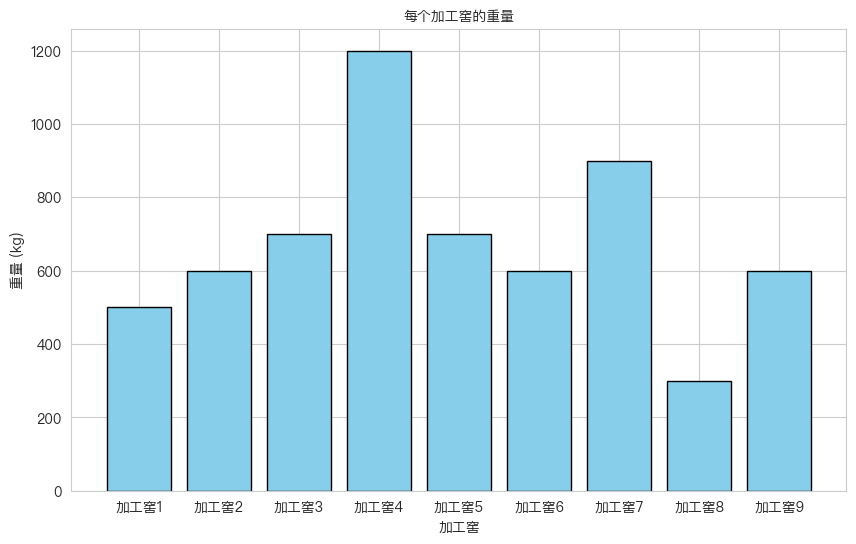

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

font_path = '/System/Library/Fonts/PingFang.ttc'
my_font = FontProperties(fname=font_path)

# 加工窖数据
silos_data = {
    1: {"raw_materials": [3, 15], "affinity": 0.00, "weight": 500},
    2: {"raw_materials": [1, 3, 11], "affinity": 0.00, "weight": 600},
    3: {"raw_materials": [6, 16], "affinity": 0.00, "weight": 700},
    4: {"raw_materials": [2, 8, 9], "affinity": 1.33, "weight": 1200},
    5: {"raw_materials": [3, 4], "affinity": 5.00, "weight": 700},
    6: {"raw_materials": [5, 8], "affinity": 0.00, "weight": 600},
    7: {"raw_materials": [13, 14], "affinity": 5.00, "weight": 900},
    8: {"raw_materials": [7], "affinity": 10.00, "weight": 300},
    9: {"raw_materials": [12], "affinity": 10.00, "weight": 600}
}

# 原料重量数据
weights = [300, 500, 200, 500, 300, 400, 300, 300, 400, 600, 100, 600, 500, 400, 300, 300]

# 数据处理
raw_materials_data = np.zeros((16, 9))
affinity_values = []
weight_values = []

for silo_id, silo_info in silos_data.items():
    for raw_material in silo_info["raw_materials"]:
        raw_materials_data[raw_material - 1, silo_id - 1] = weights[raw_material - 1]
    affinity_values.append(silo_info["affinity"])
    weight_values.append(silo_info["weight"])

# 转换为DataFrame
raw_materials_df = pd.DataFrame(raw_materials_data, columns=[f"加工窖{silo_id}" for silo_id in range(1, 10)], index=[f"原料{i+1}" for i in range(16)])

# 绘制每个加工窖的重量条形图
plt.figure(figsize=(10, 6))
plt.bar(range(1, 10), weight_values, color='skyblue', edgecolor='black')
plt.title('每个加工窖的重量', fontproperties=my_font)
plt.xlabel('加工窖', fontproperties=my_font)
plt.ylabel('重量 (kg)', fontproperties=my_font)
plt.xticks(range(1, 10), [f"加工窖{silo_id}" for silo_id in range(1, 10)], fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()